# Example code for searching for planets in the light curves of giants.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load the target file.

In [29]:
cvz = pd.read_csv("TICgiants_CVZ.csv", skiprows=4)
cvz.head()

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,...,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,ctlPriority,objID
0,331634865,20190415,100457.0,9315-00182-1,089-067343,20221628-7214186,NaN,J202216.27-721418.8,6.373971e+18,NaN,...,0.794980,0.832342,305.567814,-72.238597,0.018667,0.028800,1,-1,0.000691,1703737977
1,273514801,20190415,NaN,NaN,078-051841,23121458-7434464,NaN,J231214.60-743446.5,6.378877e+18,34531917.0,...,0.903932,0.686687,348.060841,-74.579593,0.022580,0.022787,1,-1,0.000068,1724955307
2,426569705,20190415,NaN,9446-00227-1,065-024616,16254528-7707037,NaN,J162545.23-770703.6,5.780489e+18,34977983.0,...,18.378037,13.629305,246.438970,-77.117738,0.018903,0.020419,1,0,0.000238,1070166816
3,317015729,20190415,NaN,9475-00369-1,068-036084,22222507-7627192,NaN,J222225.09-762719.1,6.357265e+18,35098727.0,...,21.926868,19.828297,335.604596,-76.455318,0.151630,0.166245,1,0,0.000457,1721234033
4,311106500,20190415,NaN,NaN,071-032691,17063771-7551260,NaN,J170637.70-755126.1,5.801863e+18,35004492.0,...,20.020807,15.793304,256.657307,-75.857229,0.033633,0.037108,1,0,0.000096,1176258143


In [30]:
for k in cvz.keys():
    print(k)

ID
version
HIP
TYC
UCAC
TWOMASS
SDSS
ALLWISE
GAIA
APASS
KIC
objType
typeSrc
ra
dec
POSflag
pmRA
e_pmRA
pmDEC
e_pmDEC
PMflag
plx
e_plx
PARflag
gallong
gallat
eclong
eclat
Bmag
e_Bmag
Vmag
e_Vmag
umag
e_umag
gmag
e_gmag
rmag
e_rmag
imag
e_imag
zmag
e_zmag
Jmag
e_Jmag
Hmag
e_Hmag
Kmag
e_Kmag
TWOMflag
prox
w1mag
e_w1mag
w2mag
e_w2mag
w3mag
e_w3mag
w4mag
e_w4mag
GAIAmag
e_GAIAmag
Tmag
e_Tmag
TESSflag
SPFlag
Teff
e_Teff
logg
e_logg
MH
e_MH
rad
e_rad
mass
e_mass
rho
e_rho
lumclass
lum
e_lum
d
e_d
ebv
e_ebv
numcont
contratio
disposition
duplicate_id
priority
eneg_EBV
epos_EBV
EBVflag
eneg_Mass
epos_Mass
eneg_Rad
epos_Rad
eneg_rho
epos_rho
eneg_logg
epos_logg
eneg_lum
epos_lum
eneg_dist
epos_dist
distflag
eneg_Teff
epos_Teff
TeffFlag
gaiabp
e_gaiabp
gaiarp
e_gaiarp
gaiaqflag
starchareFlag
VmagFlag
BmagFlag
splists
e_RA
e_Dec
RA_orig
Dec_orig
e_RA_orig
e_Dec_orig
raddflag
wdflag
ctlPriority
objID


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


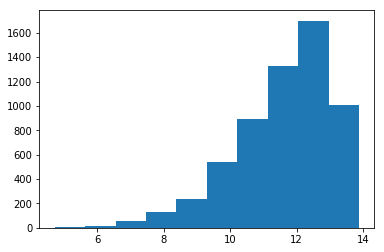

In [25]:
plt.hist(cvz.GAIAmag);

In [88]:
import eleanor

# star = eleanor.multi_sectors(tic=38846515, sectors=[1, 2, 3], tc=True)
# star = eleanor.multi_sectors(tic=cvz.ID.values[0], sectors=[1, 2, 3], tc=True)
# print(cvz.ID.values[0])
for i in range(40, 50):
    print(i)
    try:
        star = eleanor.Source(tic=cvz.ID.values[i], sector=1, tc=True)
    except:
        print("fail")
        
# star = eleanor.Source(tic=cvz.ID.values[25], sector=1, tc=True)

40
fail
41
fail
42
fail
43
fail
44
fail
45
fail
46
fail
47
fail
48
fail
49
fail


In [61]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

100%|██████████| 1282/1282 [00:09<00:00, 138.80it/s]


Text(0.5, 0, 'Time')

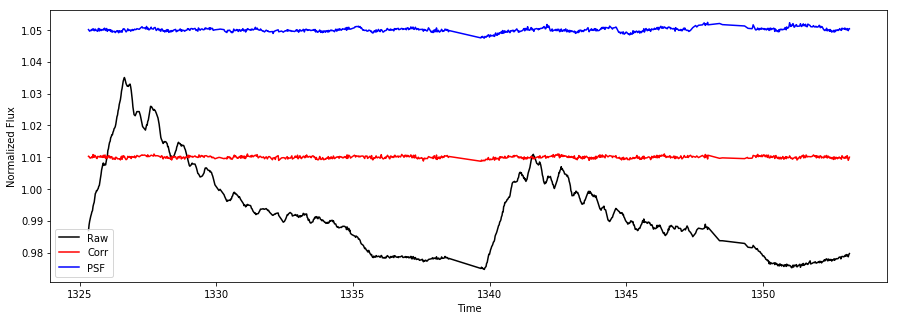

In [62]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.median(data.raw_flux[q])-0.01, 'k', label="Raw")
plt.plot(data.time[q], data.corr_flux[q]/np.median(data.corr_flux[q]) + 0.01, 'r', label="Corr")
plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q]) + 0.05, 'b', label="PSF")

plt.legend()
plt.ylabel('Normalized Flux')
plt.xlabel('Time')

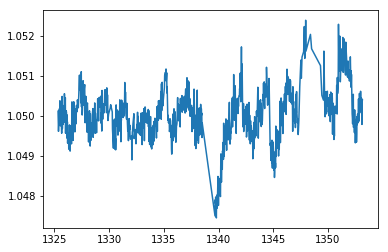

In [63]:
plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q]) + 0.05, label="PSF")

(-0.1, 1.5)

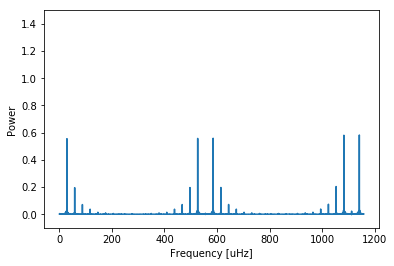

In [58]:
import astropy.stats as ass

def perday_to_uHz(freq_perday):
    return freq_perday/24/3600 * 1e6

def uHz_to_perday(freq_uHz):
    return (freq_uHz * 1e-6)*24*3600

freq = np.linspace(1./15, 1./.01, 100000)
# freq = np.linspace(uHz_to_perday(283), uHz_to_perday(1000), 100000)
ps = 1./freq

time = data.time[q]
flux = data.psf_flux[q]/np.median(data.psf_flux[q])
flux_err = np.ones_like(flux) * 1e-5

power = ass.LombScargle(time, flux, flux_err).power(freq)
plt.plot(freq/24/3600 * 1e6, power)
plt.xlabel("Frequency [uHz]")
plt.ylabel("Power")
# plt.xlim(200, 1000)
plt.ylim(-.1, 1.5)

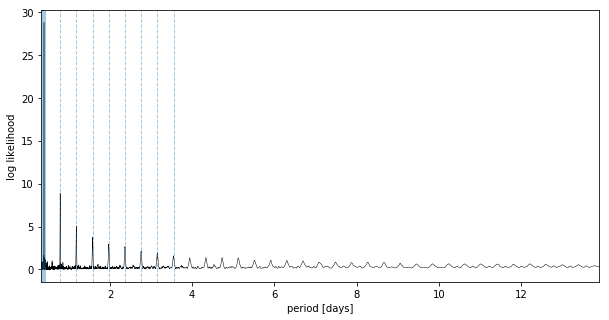

In [92]:
from astropy.stats import BoxLeastSquares

model = BoxLeastSquares(time, flux)
results = model.autopower(0.16)
period = results.period[np.argmax(results.power)]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(results.period, results.power, "k", lw=0.5)
ax.set_xlim(results.period.min(), results.period.max())
ax.set_xlabel("period [days]")
ax.set_ylabel("log likelihood")

# Highlight the harmonics of the peak period
ax.axvline(period, alpha=0.4, lw=4)
for n in range(2, 10):
    ax.axvline(n*period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(period / n, alpha=0.4, lw=1, linestyle="dashed")